<a href="https://colab.research.google.com/github/Yassmina-Abdo/unsupervised_learning/blob/main/k_means_from_scratch_by_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Load Dataset

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Intialization Centers

In [ ]:
def init_centroids(df,k):
  # Choose Point From Data by Random to be Centroid-- we have in iris data 4 features with 4 Dim with k clusters 
  # A one point or centroid is about (-,-,-,-)
  centroids_df = df.sample(n= k)
  # Centroids data frame is a 3x4 Dims
  print(centroids_df.shape)
  return centroids_df 

#Draw 2 Features With Centroids

(3, 4)


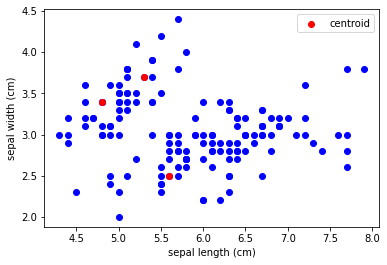

In [ ]:
def draw_points_centroids(df,x=df.columns[0],y=df.columns[1],centroids_df=None):

  plt.scatter(df[x],df[y],c='blue')
  plt.scatter(centroids_df[x],centroids_df[y],c='red',label='centroid')
  plt.legend()
  plt.xlabel(x)
  plt.ylabel(y)

centroids_df = init_centroids(df,3)
draw_points_centroids(df,df.columns[0], df.columns[1],centroids_df)

#Calculate Distance by Euclidean- Norm

In [ ]:
def calculate_distance(point,center):
  return np.sqrt(np.sum(np.square(point-center)))


# Update Centroids

In [ ]:
def Update_centroids(df,centroids_df):
  centroids_dfs=list()
  for i in range(len(centroids_df)):
    # calculate mean rows of each dataframe -- dataframe here is a cluster points
    centroids_dfs.append(df[df.Cluster ==i].iloc[:,:-2].mean(axis=0))
   
  return pd.DataFrame(centroids_dfs)


In [ ]:
def calculate_cost(df,centroids_df):
  wcss=0
  for i in range(len(df)):
    #wcss+= df[df.Cluster ==i].loc[:,'Error'].sum(axis=0)
    wcss+= df.loc[:,'Error'].sum(axis=0)


  return wcss  

# Applay k-means

In [ ]:
def Kmeans(df,centroids_df,max_iter=20):
 
  for _ in range(max_iter):
    costs=list()
    wcss_list=list()
    # Loop on each data point
    for i in range(len(df)):
      # Loop on each Centroid
      distance_list=list()
      for j in range(len(centroids_df)):

        # calculate Distance between point and the centroid
        dist = calculate_distance(df.iloc[i,:],centroids_df.iloc[j,:])
        distance_list.append(dist)

      # Append cost of ef each cluster of same point
      df.loc[i,'Error']= min(distance_list)
    
      # Assign number of cluster that have min dist to cluster col
      df.loc[i,'Cluster']= distance_list.index(min(distance_list))
    
     # calculate wcss
    wcss=calculate_cost(df,centroids_df)
    # calculate new centroids
    new_centroids= Update_centroids(df,centroids_df)
   
    #wcss=sum((np.array(costs)).sum(axis=0)) 
    
  return df,new_centroids,wcss


# Algorithm With K=3

(3, 4)


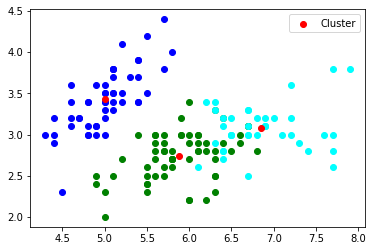

In [ ]:
k=3
df = pd.DataFrame(data.data, columns=data.feature_names)
centroids_df = init_centroids(df,k)
df,new_centroids,wcss=Kmeans(df,centroids_df,100)

color=['blue','green','cyan']
for i in range(k):
    data=df[df["Cluster"]==i]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=color[i])
plt.scatter(new_centroids.iloc[:,0],new_centroids.iloc[:,1],c='red',label='Cluster')
plt.legend()
plt.show()

#Elbow Algorithm

In [ ]:
cost_list = []
for k in range(2, 10):
    df = pd.DataFrame(data.data, columns=data.feature_names)
    centroids_df = init_centroids(df,k)
    df,new_centroids,wcss=Kmeans(df,centroids_df,20) 
    cost_list.append(wcss)

(2, 4)
(3, 4)
(4, 4)
(5, 4)
(6, 4)
(7, 4)
(8, 4)
(9, 4)


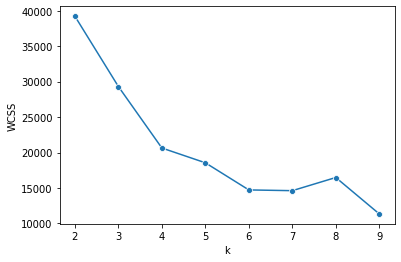

In [ ]:
sns.lineplot(x=range(2,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()